In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib_inline.backend_inline
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from pathlib import Path
import numpy as np
import eazy
import pickle
import gc
import os
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge')
os.chdir(WD)
TEMPDIR = WD.parent / 'BROWN_COSMOS'

from utils import get_result_figures

In [4]:
scheme = "GAMA_COSMOS_7DS_WFS_SPHEREx"
base_all = Table.read(WD / "data" / "input" / f"GAMA_COSMOS_input_7DS_WFS_SPHEREx.fits")
base = base_all["ID", "imag", "z_spec", "FLAG_ML"]
outdir = WD / "output" / f"output_{scheme}"

outtab = Table.read(outdir / "output00.fits")

colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'pit', 'crps', 'id']
for label in colnames:
    base[label] = np.empty(len(base), dtype=float)
    
i = 0

start_id = i*10000
end_id = (i+1)*10000

for label in colnames:
    base[label][start_id:end_id] = outtab[label]

In [5]:
base = base[start_id:end_id]

In [6]:
base

ID,imag,z_spec,FLAG_ML,z_phot,z_phot_chi2,z160,z840,pit,crps,id
,mag,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12,23.990103981421147,0.707,0.0,0.486939400434494,145.06173706054688,0.004006005357950926,0.004006005357950926,0.6561278104782104,0.10908088088035583,12.0
27,24.875468381594267,0.7751,0.0,0.6951285600662231,146.44830322265625,0.004006005357950926,0.004006005357950926,0.45003175735473633,0.08613313734531403,27.0
57,24.701907916699273,0.9672,0.0,1.1974376440048218,149.72540283203125,0.004006005357950926,0.004006005357950926,0.05794919282197952,0.32232820987701416,57.0
73,22.48269003598378,0.429,0.0,0.5650541186332703,117.66346740722656,0.004006005357950926,0.004006005357950926,0.21431681513786316,0.07545405626296997,73.0
74,23.767750415802425,1.5087,1.0,0.8503568768501282,108.0108871459961,0.004006005357950926,0.004006005357950926,0.8313854932785034,0.34614497423171997,74.0
82,24.707701668462914,0.3562,0.0,0.21580345928668976,118.39276885986328,0.004006005357950926,0.004006005357950926,0.08932699263095856,1.2008399963378906,82.0
85,23.76854613020753,1.08,0.0,0.6355363130569458,130.32281494140625,0.004006005357950926,0.004006005357950926,0.697541356086731,0.32300865650177,85.0
104,24.480462347939646,1.2817,0.0,0.6671156287193298,133.0005645751953,0.004006005357950926,0.004006005357950926,0.4688494801521301,0.5254986882209778,104.0


/data1/hbahk/spherex-photoz/spherex-challenge/joint_challenge/utils.py:933: RuntimeWarning: divide by zero encountered in divide
  sigz = (np.max([z_840 - z_phot, z_phot - z_160], axis=0) / (1 + z_phot))


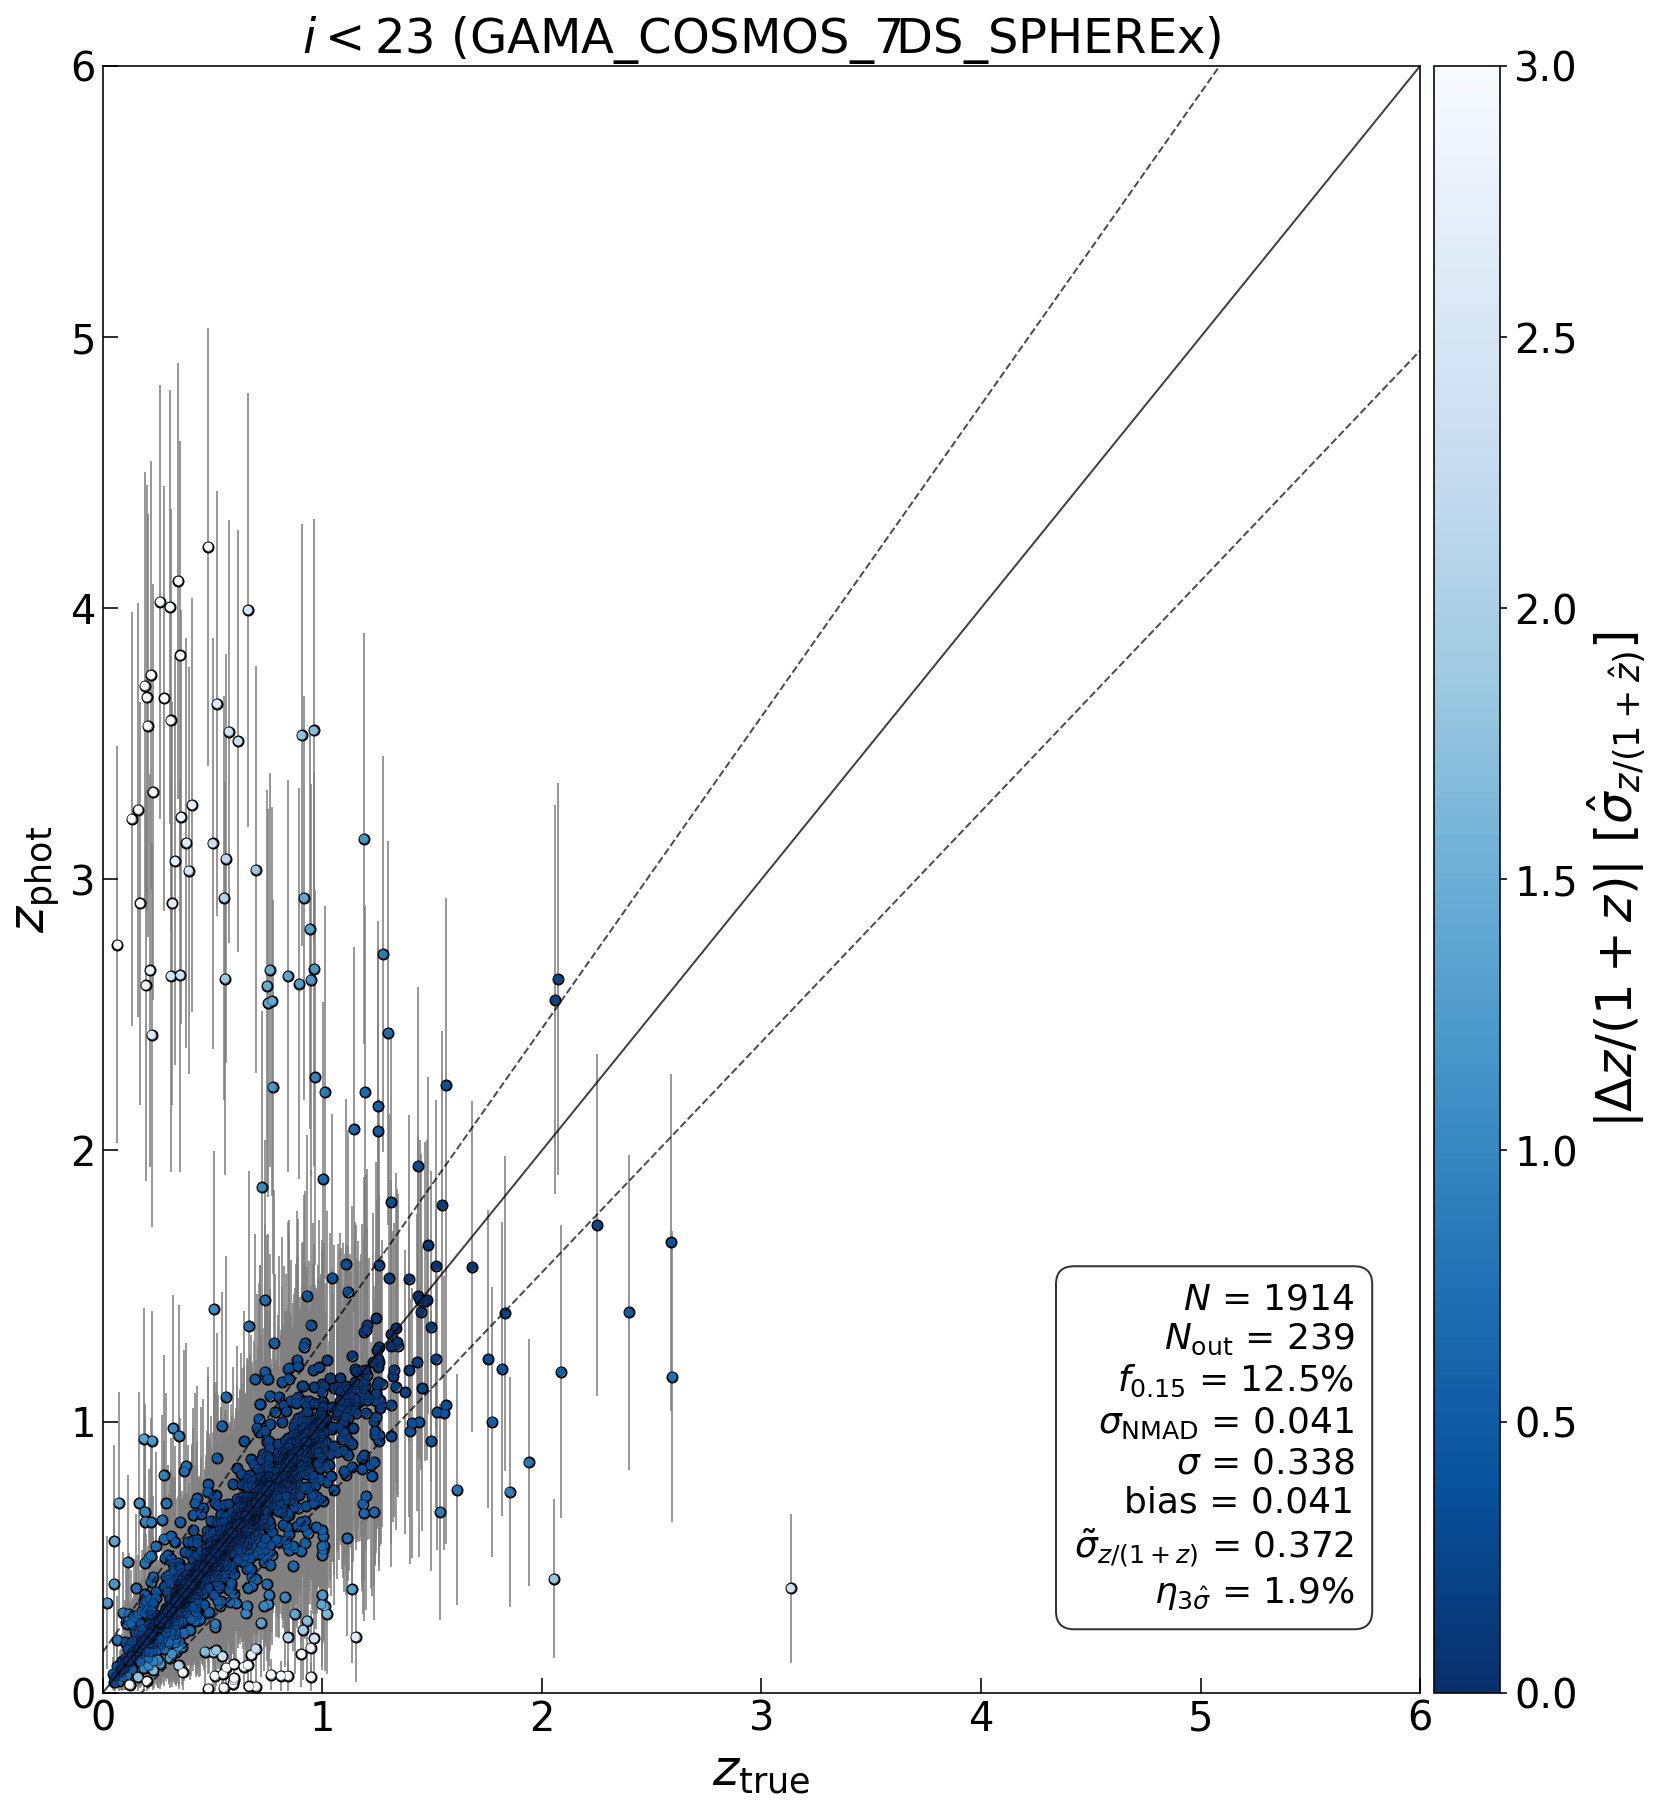

In [7]:
from utils import plot_comp_hexbin
figdir = WD / 'figures'
figdir.mkdir(exist_ok=True)

imask = base['imag'] < 23

id_out = plot_comp_hexbin(base['z_spec'][imask], base['z_phot'][imask],
                        base['z_phot_chi2'][imask],
                        figdir/'test.png', base['id'][imask],
                        z_160=base['z160'][imask], z_840=base['z840'][imask],
                        label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                        title="$i<23$"+f" ({scheme})", xmin=0, xmax=6, cmap='jet',
                        scatter_plot=True, gridsize=(87,50), log_scale=False,
                        residual_plot=False, no_hexbin=True, figsave=False, figclose=False)

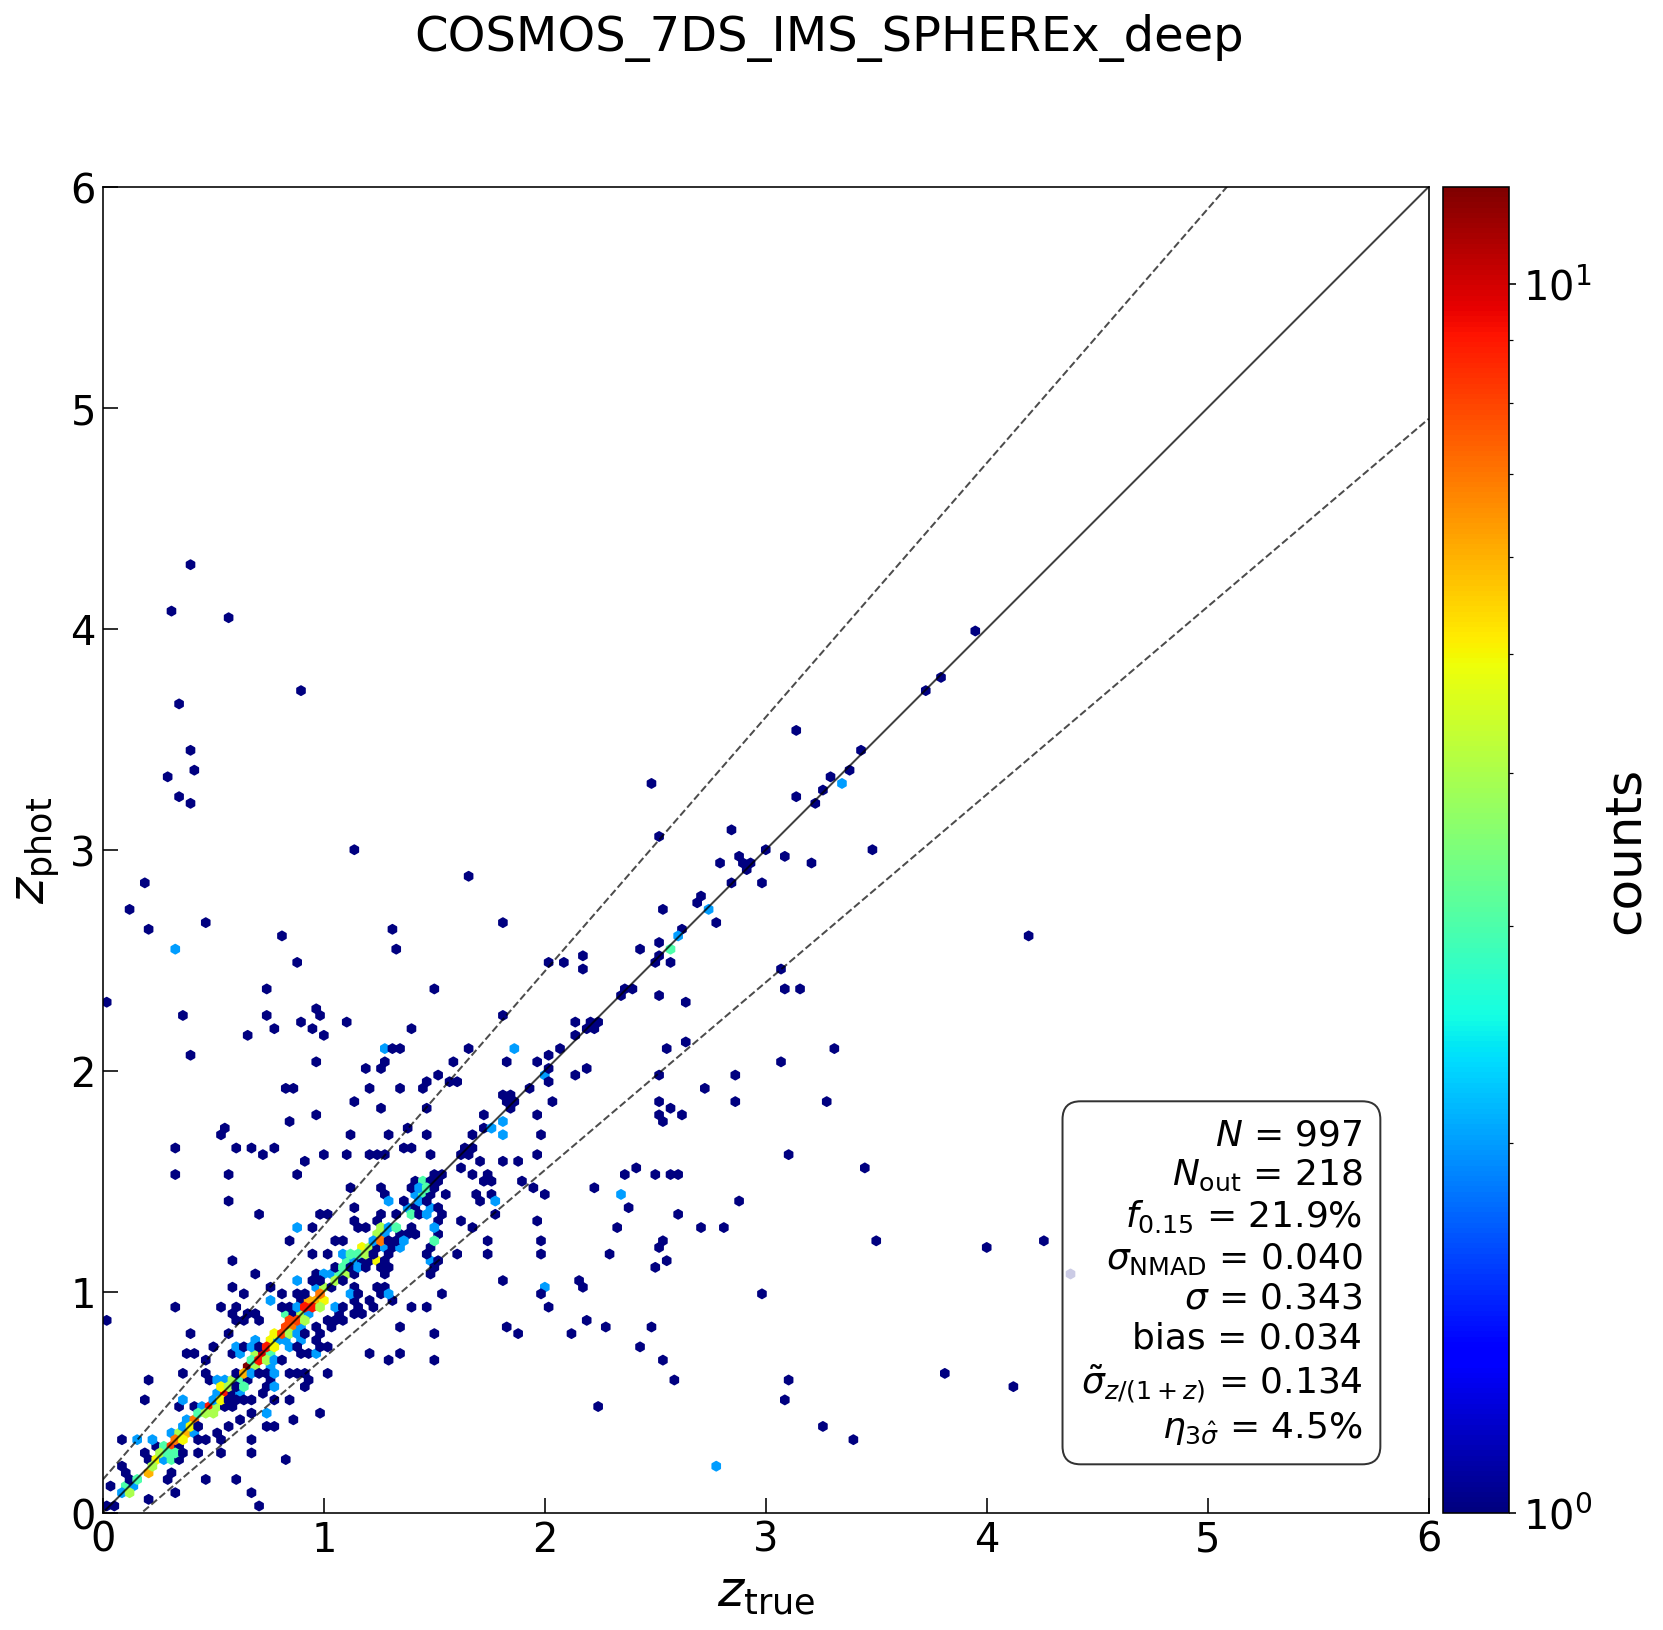

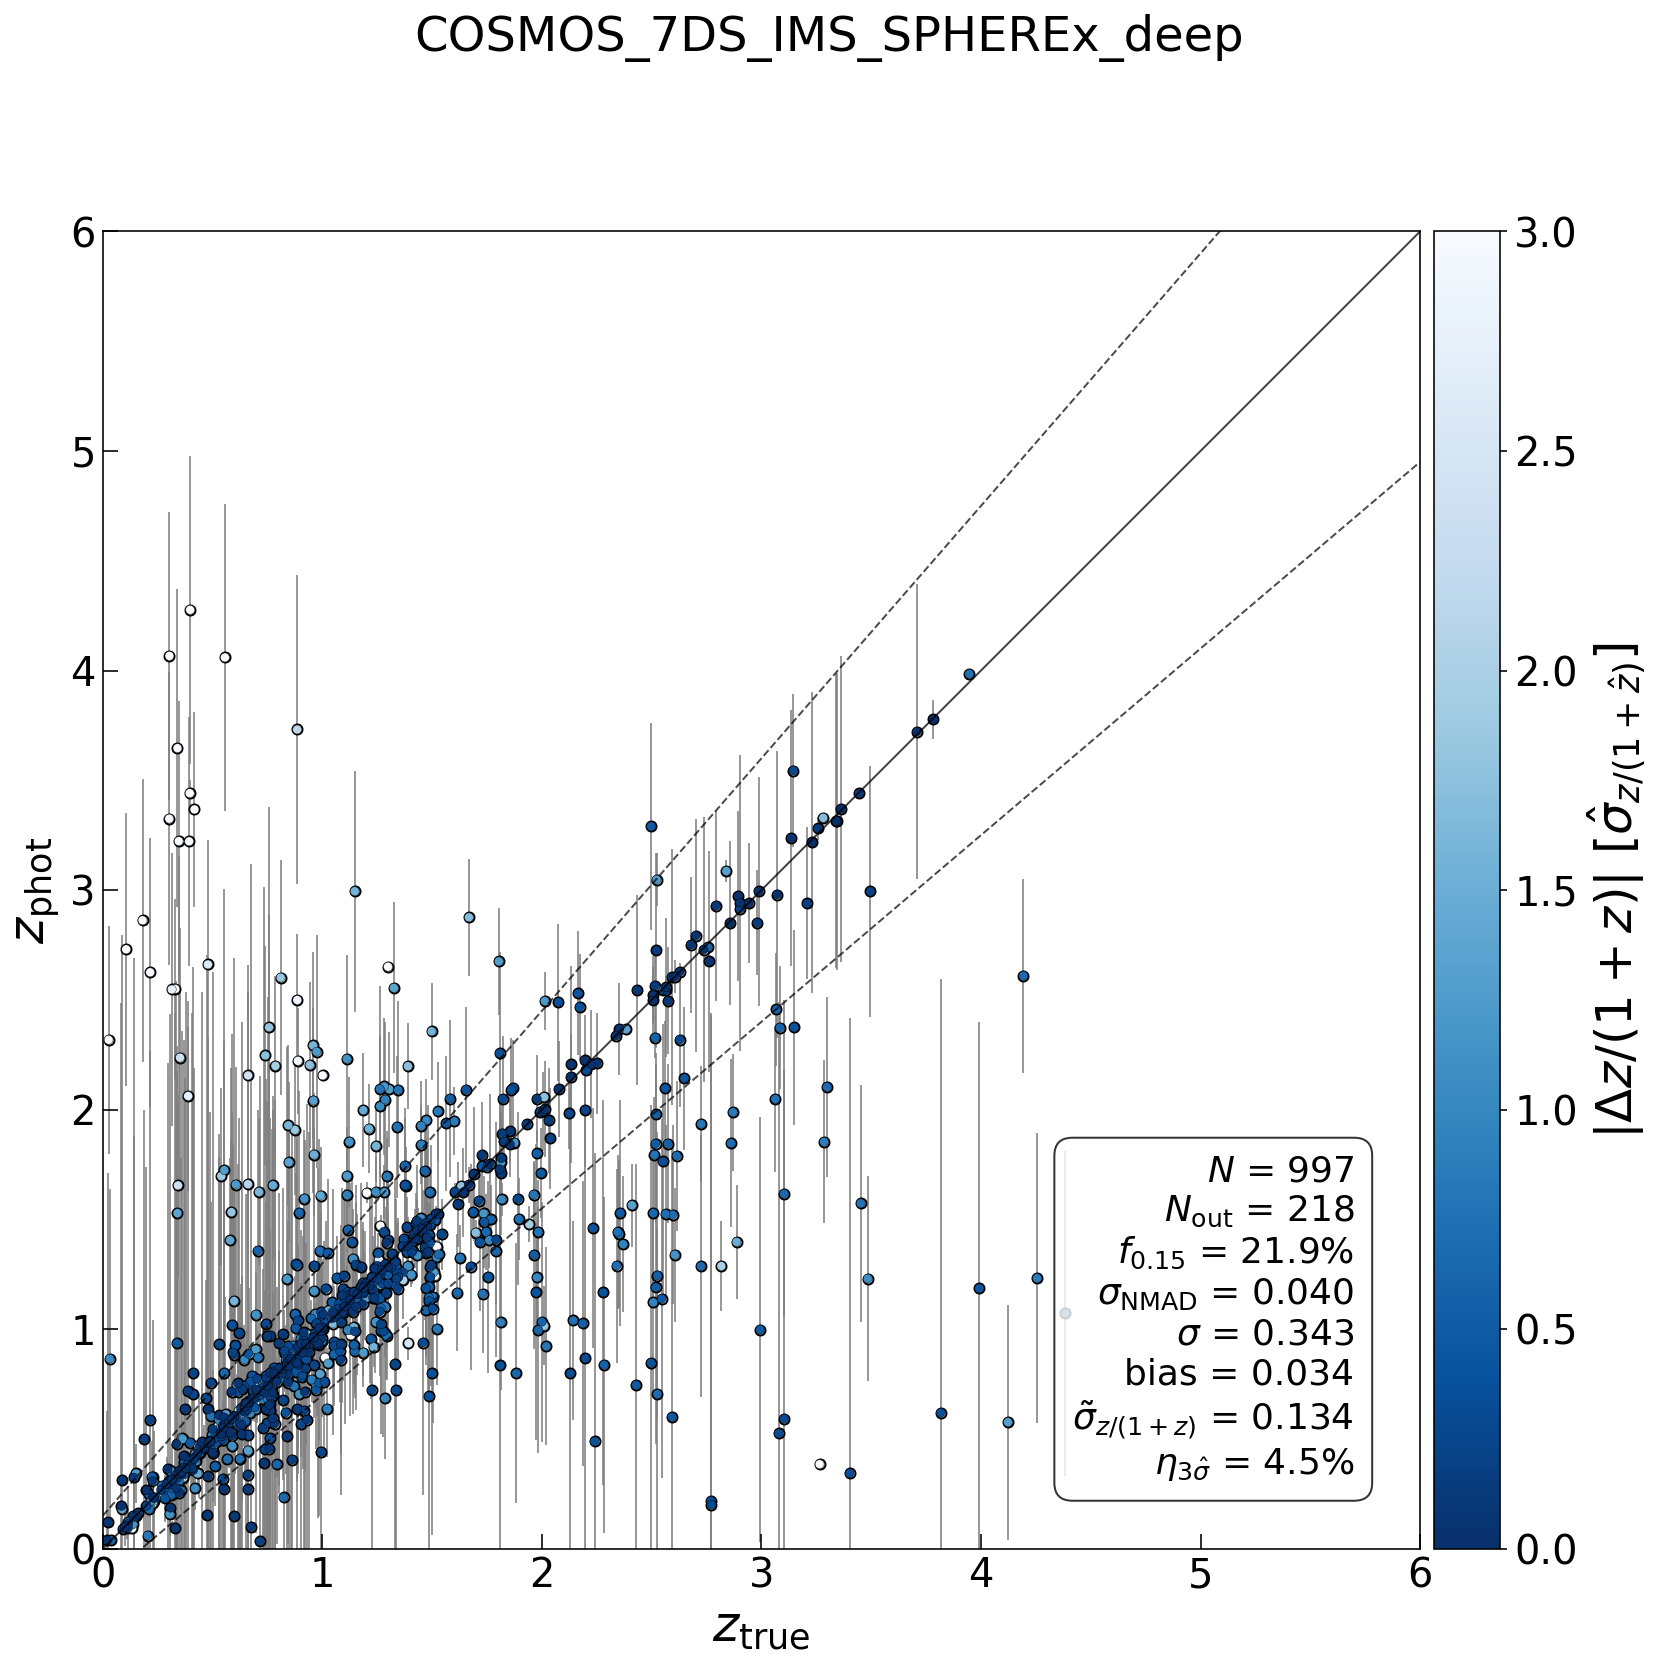

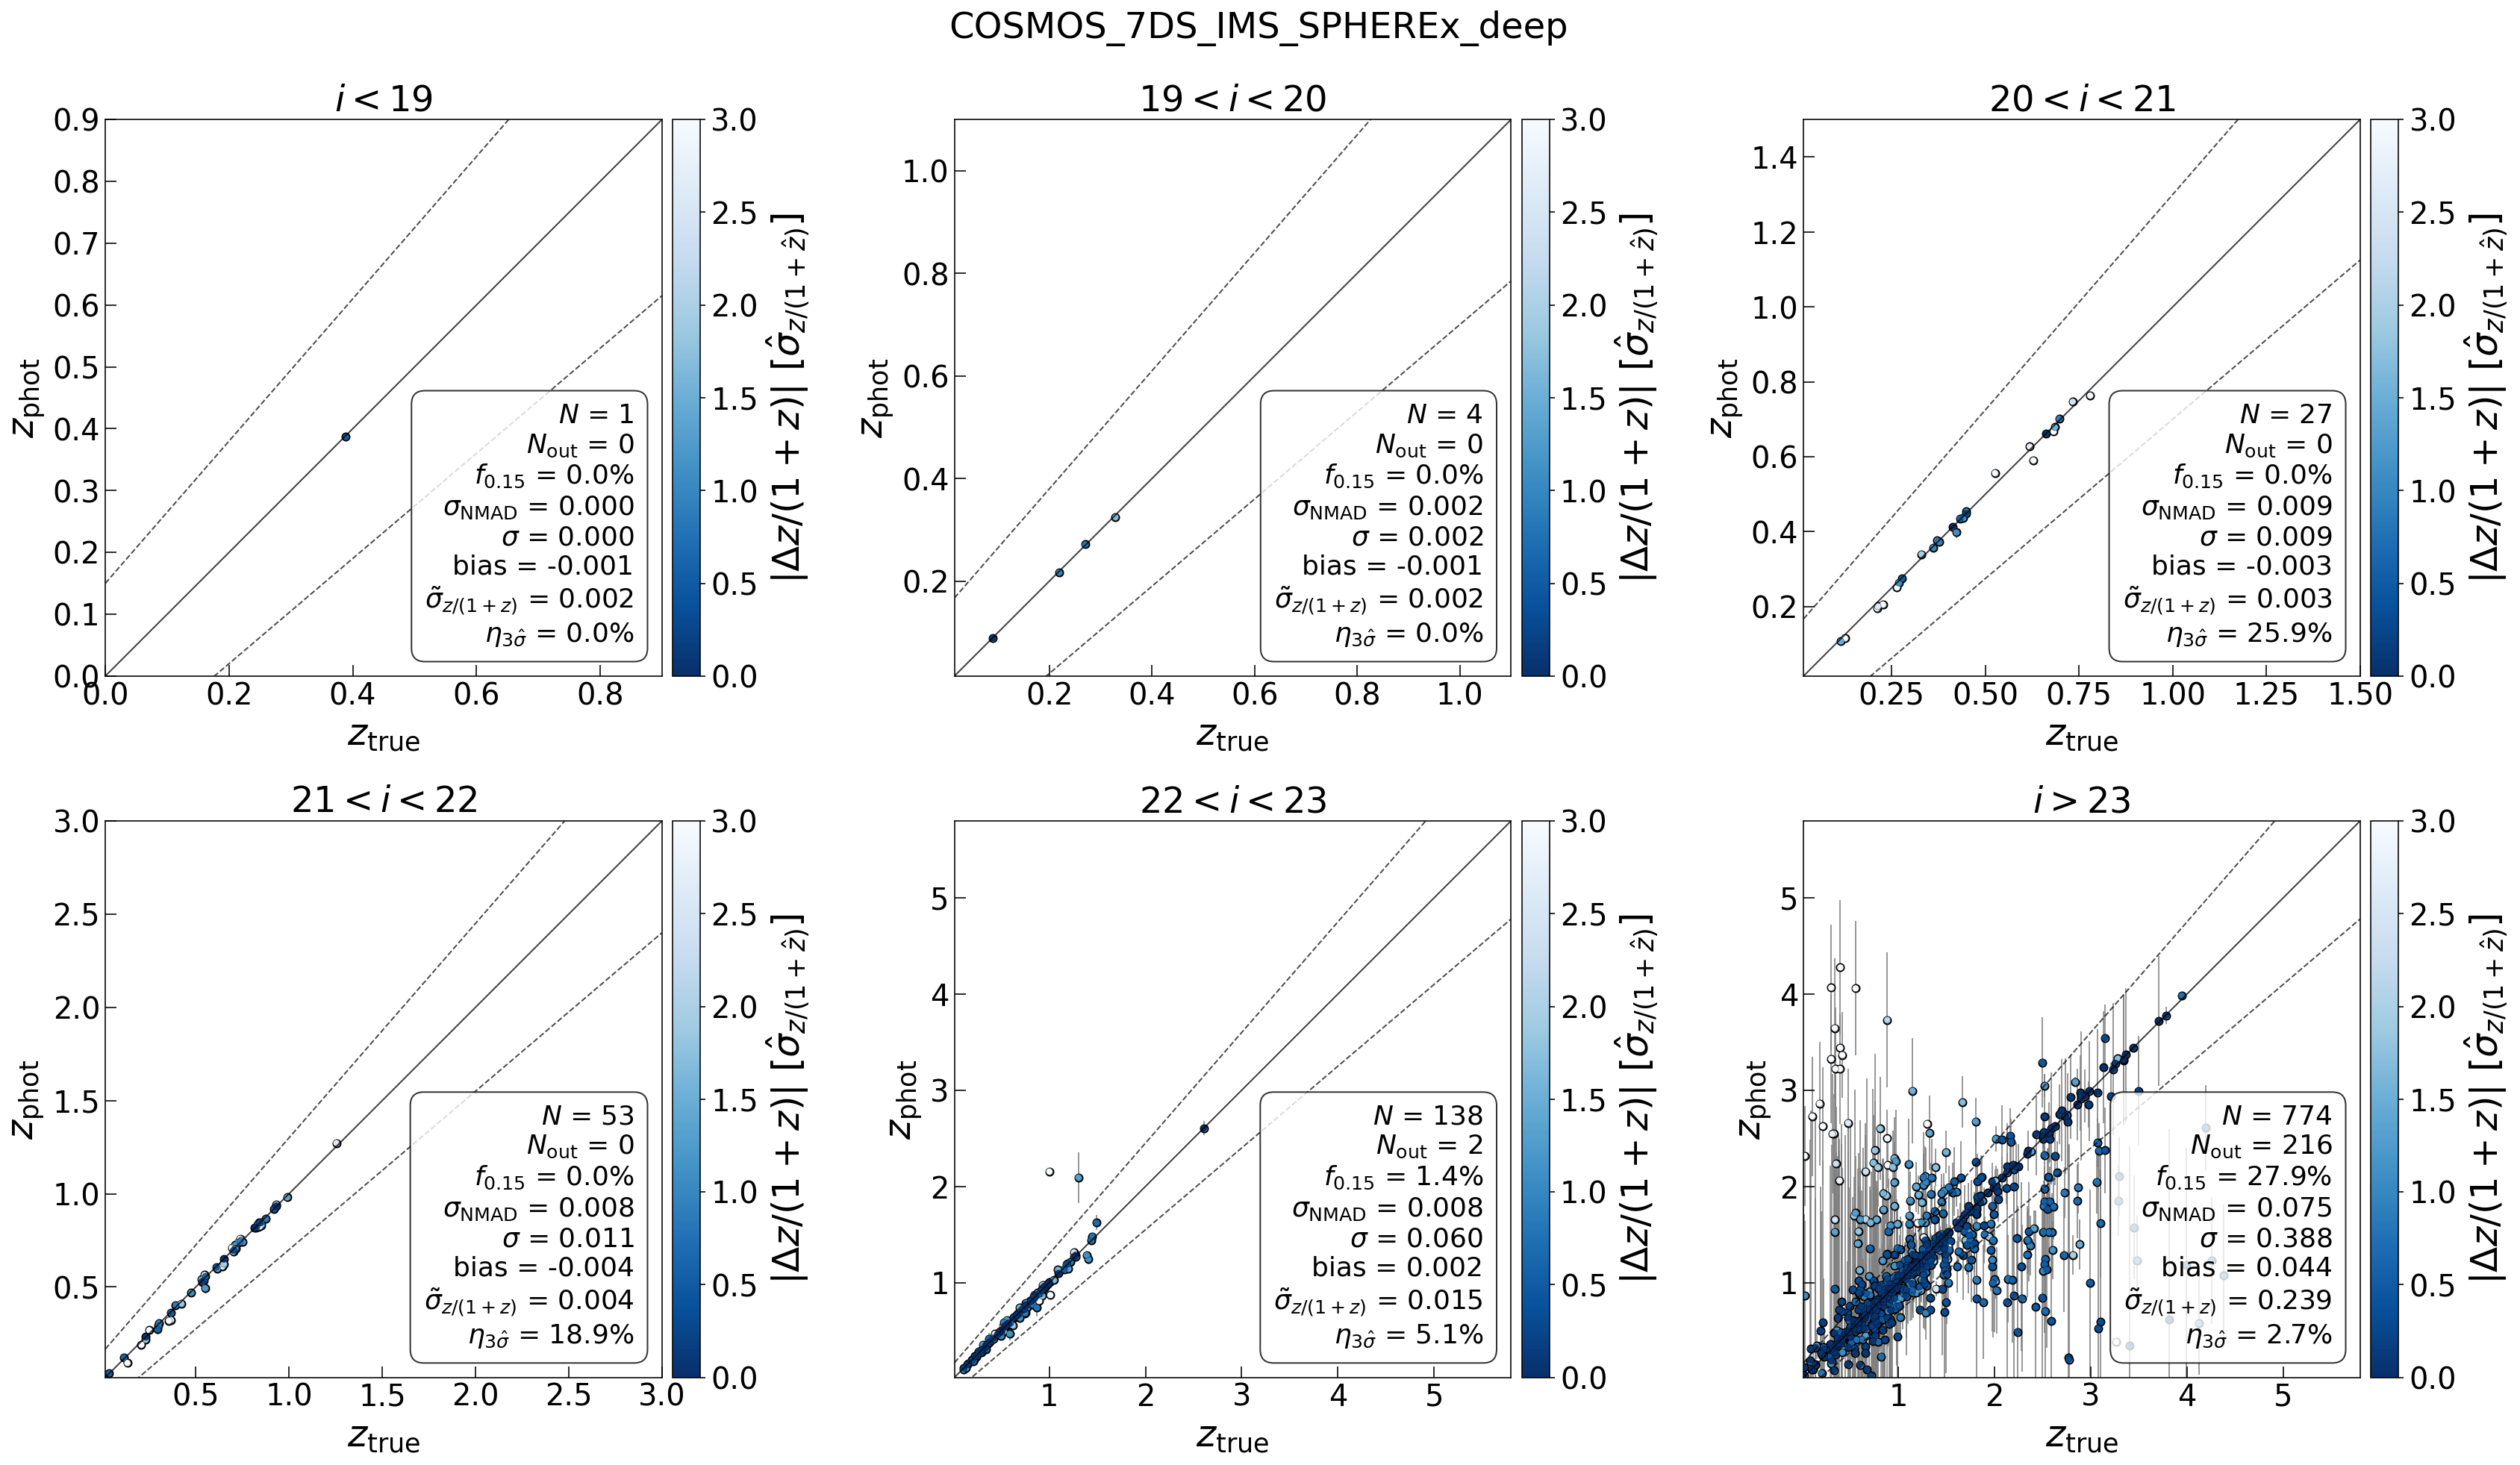

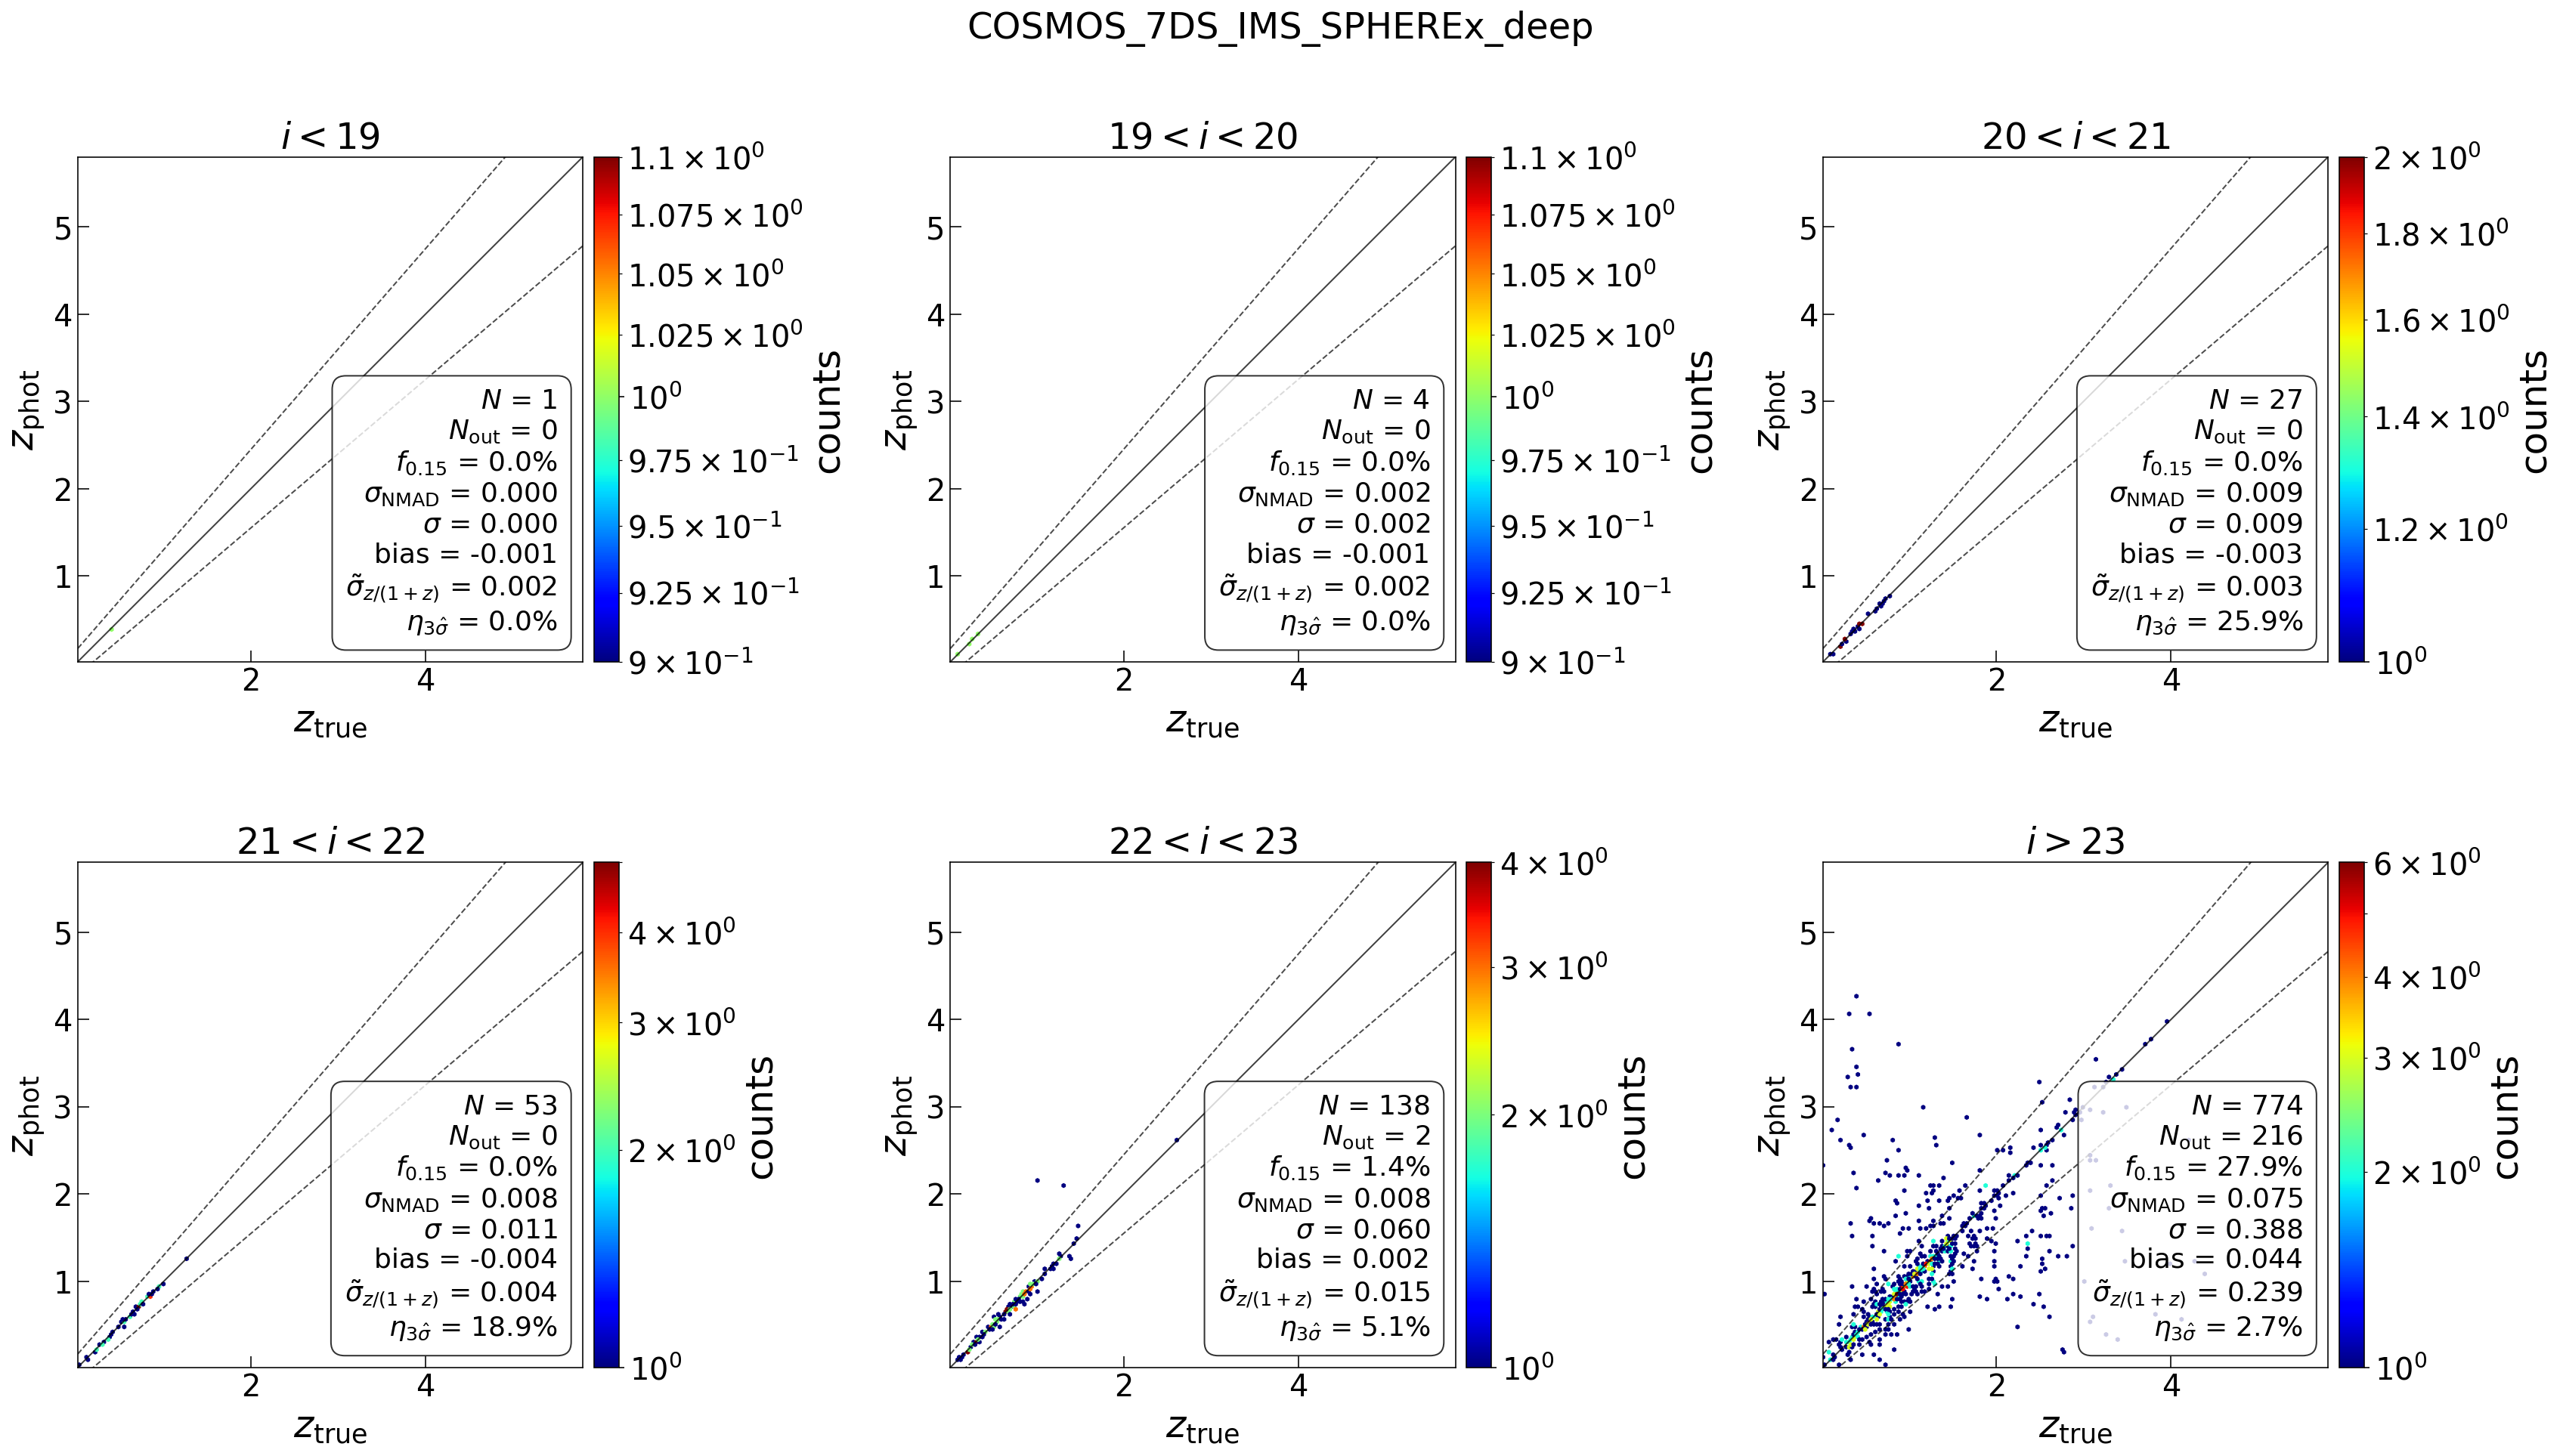

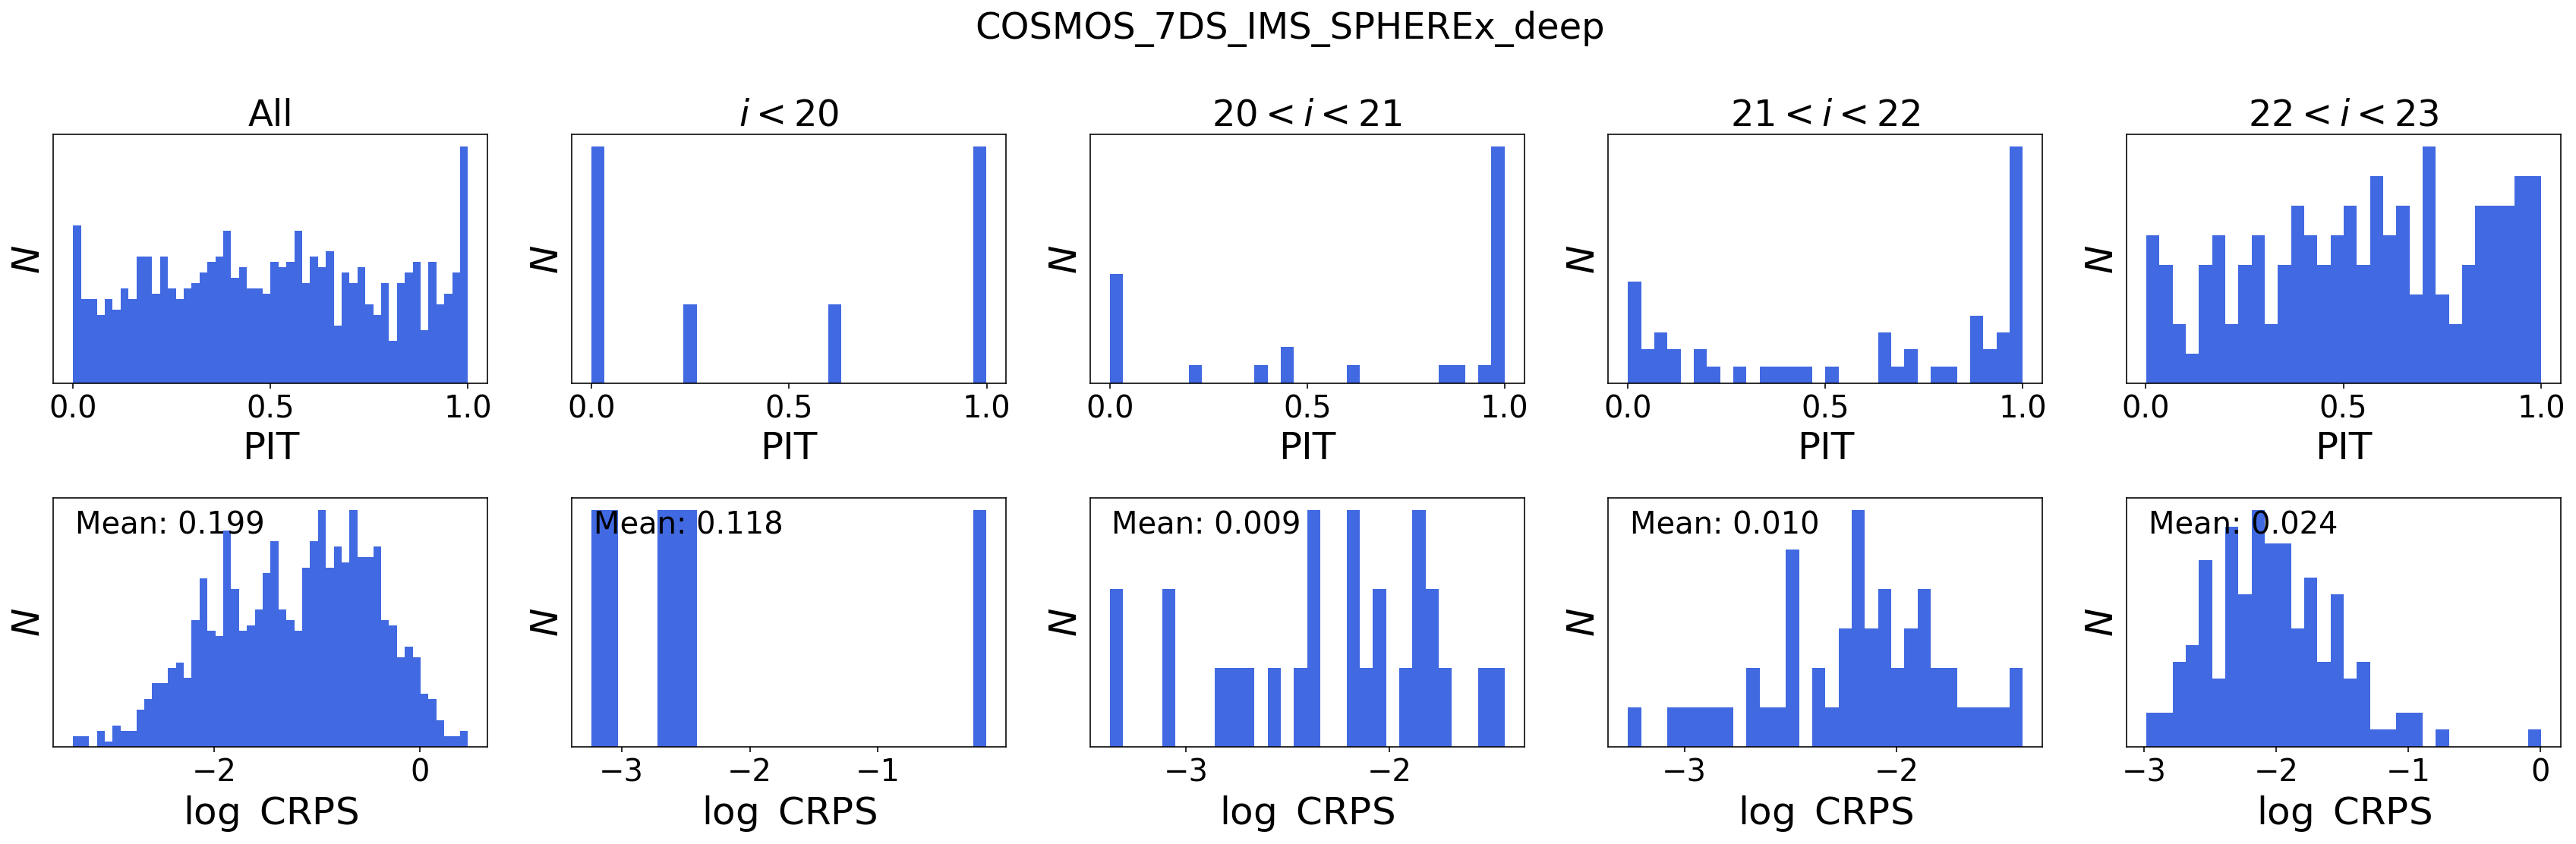

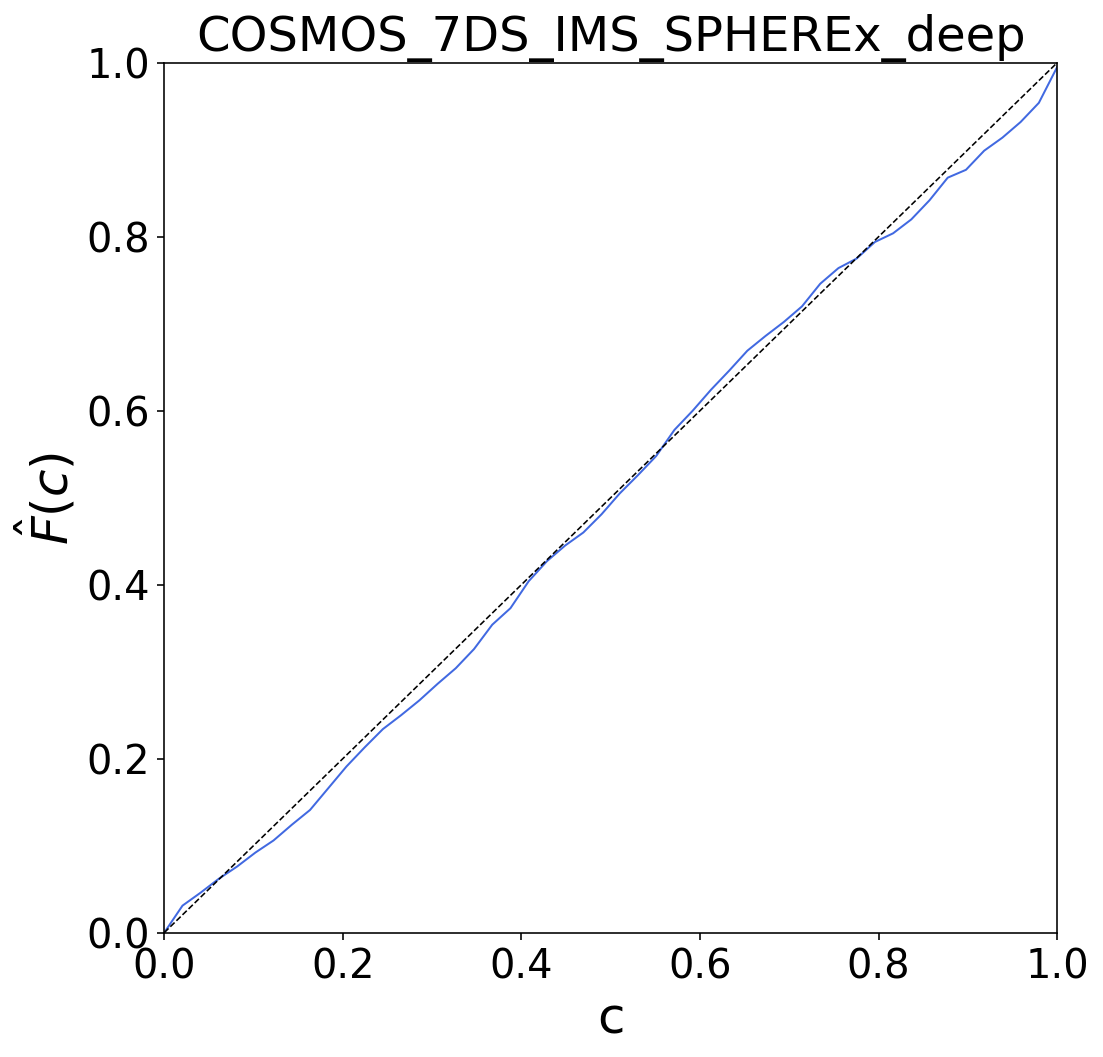

In [26]:
from utils import plot_comp_hexbin

schemes = [
    "COSMOS_7DS_IMS_SPHEREx_deep",
    # "GAMA_COSMOS_7DS_WFS_SPHEREx",
    # "GAMA_COSMOS_SPHEREx",
    # "GAMA_7DS_RIS",
    # "GAMA_7DS_WFS",
    # "GAMA_7DS_IMS",
    # "COSMOS_7DS_RIS",
    # "COSMOS_7DS_WFS",
    # "COSMOS_7DS_IMS",
]
for scheme in schemes:
    outdir = WD / "output" / f"output_{scheme}"
    base = Table.read(outdir / "result.fits")
    base.rename_column("z_spec", "z_true")
    if "HSC_i_MAG" in base.colnames:
        base.rename_column("HSC_i_MAG", "imag")
    figdir = outdir / "figures"
    figdir.mkdir(exist_ok=True)

    fighball = plt.figure(figsize=(12, 12))
    figscall = plt.figure(figsize=(12, 12))
    axeshball = fighball.add_subplot(111)
    axesscall = figscall.add_subplot(111)

    id_out = plot_comp_hexbin(
        base["z_true"],
        base["z_phot"],
        base["z_phot_chi2"],
        figdir / "i19_scatter.png",
        base["id"],
        z_160=base["z160"],
        z_840=base["z840"],
        label_x=r"$z_{\rm true}$",
        label_y=r"$z_{\rm phot}$",
        xmin=0,
        xmax=6,
        cmap="jet",
        scatter_plot=True,
        gridsize=(87, 50),
        log_scale=False,
        residual_plot=False,
        no_hexbin=True,
        figsave=False,
        figclose=False,
        ax=axesscall,
    )
    id_out = plot_comp_hexbin(
        base["z_true"],
        base["z_phot"],
        base["z_phot_chi2"],
        figdir / "i19_hexhist.png",
        base["id"],
        z_160=base["z160"],
        z_840=base["z840"],
        label_x=r"$z_{\rm true}$",
        label_y=r"$z_{\rm phot}$",
        xmin=0,
        xmax=6,
        cmap="jet",
        scatter_plot=False,
        gridsize=(87 * 2, 50 * 2),
        log_scale=False,
        residual_plot=False,
        figsave=False,
        figclose=False,
        ax=axeshball,
    )
    axeshball.set_aspect("equal")
    axesscall.set_aspect("equal")
    figscall.suptitle(scheme)
    fighball.suptitle(scheme)
    figscall.tight_layout()
    fighball.tight_layout()
    fighball.savefig(figdir / "hexbin_allmagbins_single.png", dpi=200)
    figscall.savefig(figdir / "hexhist_allmagbins_single.png", dpi=200)


    fighb, axeshb = plt.subplots(2, 3, figsize=(24, 14))
    figsc, axessc = plt.subplots(2, 3, figsize=(24, 14))

    imask = base["imag"] < 19
    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i19_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$i<19$",
            xmin=0,
            xmax=0.9,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[0, 0],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i19_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$i<19$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[0, 0],
        )
    else:
        axeslist = [axeshb[0, 0], axessc[0, 0]]
        for ax in axeslist:
            ax.set_title("$i<19$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)

    imask = (base["imag"] > 19) & (base["imag"] < 20)
    
    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i20_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$19<i<20$",
            xmin=0.015,
            xmax=1.1,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[0, 1],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i20_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$19<i<20$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[0, 1],
        )
    else:
        axeslist = [axeshb[0, 1], axessc[0, 1]]
        for ax in axeslist:
            ax.set_title("$19<i<20$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)

    imask = (base["imag"] > 20) & (base["imag"] < 21)

    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i21_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$20<i<21$",
            xmin=0.015,
            xmax=1.5,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[0, 2],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i21_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$20<i<21$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[0, 2],
        )
    else:
        axeslist = [axeshb[0, 2], axessc[0, 2]]
        for ax in axeslist:
            ax.set_title("$20<i<21$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)

    imask = (base["imag"] > 21) & (base["imag"] < 22)
    
    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i22_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$21<i<22$",
            xmin=0.015,
            xmax=3,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[1, 0],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i22_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$21<i<22$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[1, 0],
        )
    else:
        axeslist = [axeshb[1, 0], axessc[1, 0]]
        for ax in axeslist:
            ax.set_title("$21<i<22$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)

    imask = (base["imag"] > 22) & (base["imag"] < 23)
    
    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i23_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$22<i<23$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[1, 1],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i23_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$22<i<23$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[1, 1],
        )
    else:
        axeslist = [axeshb[1, 1], axessc[1, 1]]
        for ax in axeslist:
            ax.set_title("$22<i<23$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)

    imask = base["imag"] > 23
    
    if np.count_nonzero(imask) > 0:
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i25_scatter.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$i>23$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=True,
            gridsize=(87, 50),
            log_scale=False,
            residual_plot=False,
            no_hexbin=True,
            figsave=False,
            figclose=False,
            ax=axeshb[1, 2],
        )
        id_out = plot_comp_hexbin(
            base["z_true"][imask],
            base["z_phot"][imask],
            base["z_phot_chi2"][imask],
            figdir / "i25_hexhist.png",
            base["id"][imask],
            z_160=base["z160"][imask],
            z_840=base["z840"][imask],
            label_x=r"$z_{\rm true}$",
            label_y=r"$z_{\rm phot}$",
            title="$i>23$",
            xmin=0.015,
            xmax=5.8,
            cmap="jet",
            scatter_plot=False,
            gridsize=(87 * 2, 50 * 2),
            log_scale=False,
            residual_plot=False,
            figsave=False,
            figclose=False,
            ax=axessc[1, 2],
        )
    else:
        axeslist = [axeshb[1, 2], axessc[1, 2]]
        for ax in axeslist:
            ax.set_title("$i>23$")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.text(0.5, 0.5, "No objects", ha="center", va="center",
                    transform=ax.transAxes)
    
    for ax in axeshb.flatten():
        ax.set_aspect("equal")
    for ax in axessc.flatten():
        ax.set_aspect("equal")

    fighb.suptitle(scheme)
    figsc.suptitle(scheme)

    fighb.tight_layout()
    figsc.tight_layout()
    fighb.savefig(figdir / "hexbin_allmagbins.png", dpi=200)
    figsc.savefig(figdir / "hexhist_allmagbins.png", dpi=200)

    color = "royalblue"
    fig, axes = plt.subplots(2, 5, figsize=(24, 8))
    ax = axes[0, 0]
    ax.hist(base["pit"], bins=50, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title("All")

    ax = axes[1, 0]
    crpsmask = base["crps"] > 0
    ax.hist(np.log10(base["crps"][crpsmask]), bins=50, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.text(
        0.05,
        0.95,
        f"Mean: {np.mean(base['crps'][crpsmask]):.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

    pitmask = base["imag"] < 20
    ax = axes[0, 1]
    ax.hist(base["pit"][pitmask], bins=30, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"$i<20$")
    ax = axes[1, 1]
    ax.hist(
        np.log10(base["crps"][pitmask & crpsmask]),
        bins=30,
        histtype="stepfilled",
        lw=1,
        color=color,
    )
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.text(
        0.05,
        0.95,
        f"Mean: {np.mean(base['crps'][pitmask & crpsmask]):.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

    pitmask = (base["imag"] > 20) & (base["imag"] < 21)
    ax = axes[0, 2]
    ax.hist(base["pit"][pitmask], bins=30, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"$20<i<21$")
    ax = axes[1, 2]
    ax.hist(
        np.log10(base["crps"][pitmask & crpsmask]),
        bins=30,
        histtype="stepfilled",
        lw=1,
        color=color,
    )
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.text(
        0.05,
        0.95,
        f"Mean: {np.mean(base['crps'][pitmask & crpsmask]):.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

    pitmask = (base["imag"] > 21) & (base["imag"] < 22)
    ax = axes[0, 3]
    ax.hist(base["pit"][pitmask], bins=30, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"$21<i<22$")
    ax = axes[1, 3]
    ax.hist(
        np.log10(base["crps"][pitmask & crpsmask]),
        bins=30,
        histtype="stepfilled",
        lw=1,
        color=color,
    )
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.text(
        0.05,
        0.95,
        f"Mean: {np.mean(base['crps'][pitmask & crpsmask]):.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

    pitmask = (base["imag"] > 22) & (base["imag"] < 23)
    ax = axes[0, 4]
    ax.hist(base["pit"][pitmask], bins=30, histtype="stepfilled", lw=1, color=color)
    ax.set_xlabel("PIT")
    ax.set_ylabel(r"$N$")
    ax.set_title(r"$22<i<23$")
    ax = axes[1, 4]
    ax.hist(
        np.log10(base["crps"][pitmask & crpsmask]),
        bins=30,
        histtype="stepfilled",
        lw=1,
        color=color,
    )
    ax.set_xlabel(r"$\log$ CRPS")
    ax.set_ylabel(r"$N$")
    ax.text(
        0.05,
        0.95,
        f"Mean: {np.mean(base['crps'][pitmask & crpsmask]):.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

    for ax in axes.flatten():
        ax.set_yticks([])

    fig.suptitle(scheme)
    fig.tight_layout()
    fig.savefig(figdir / "pit_crps_hist.png", dpi=200)
    
    cl = np.linspace(0, 1, 50)
    pit = base['pit']#[base['imag'] < 22]
    fc = np.zeros_like(cl)
    for i, c in enumerate(cl):
        fc[i] = np.count_nonzero(pit < c)
    fc = fc / len(pit)

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.plot(cl, fc, lw=1, c="royalblue")
    ax.set_xlabel("c")
    ax.set_ylabel("$\hat{F}(c)$")
    ax.set_title(scheme)# + " $i<22$")
    ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    # fig.savefig(figdir / "fc_nativefluxerr.png")
    fig.savefig(figdir / "fc_1_5.png")

(0.0, 1.0)

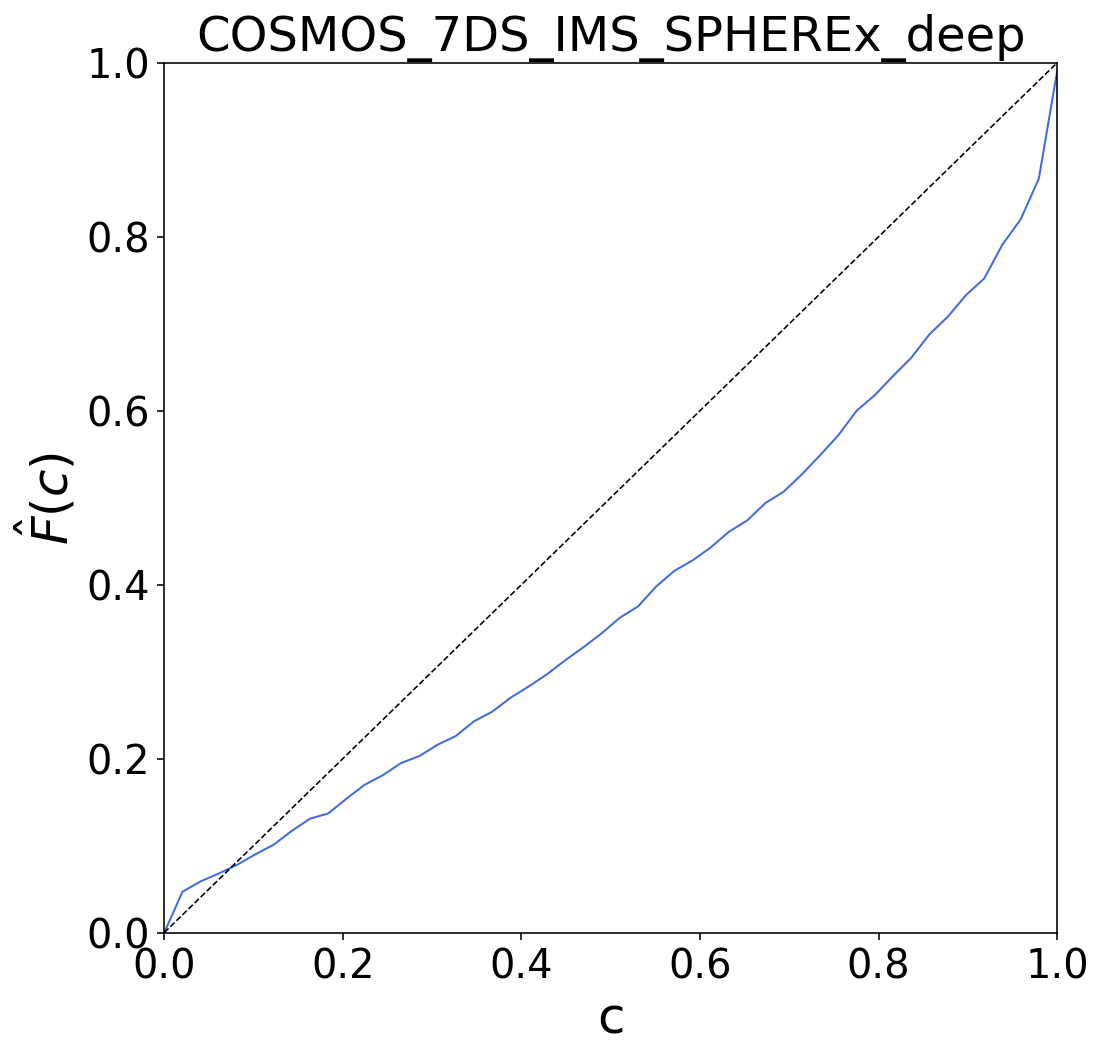

In [10]:
cl = np.linspace(0, 1, 50)
pit = base['pit']
fc = np.zeros_like(cl)
for i, c in enumerate(cl):
    fc[i] = np.count_nonzero(pit < c)
fc = fc / len(pit)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(cl, fc, lw=1, c="royalblue")
ax.set_xlabel("c")
ax.set_ylabel("$\hat{F}(c)$")
ax.set_title(scheme)
ax.plot([0, 1], [0, 1], ls="--", color="k", lw=0.8)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)